# 시간별 대중교통 데이터 시각화
---

## 시간대별 이용현황 전처리

In [1]:
import csv

d_pth='../data/subwaytime.csv'
f=open(d_pth,'r')
data=csv.reader(f)
n=0
for row in data:
    print(row)
    n+=1
    if n==5:
        print('...생략...')
        break
f.close()

['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '', '작업일시']
['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '']
['2019-01', '1호선', '0150', '서울역', '927', '22', '10,68

In [2]:
# 컴마를 없애고 맨 끝열 작업현황을 제거
with open('../data/new_subwaytime.csv','w',newline='') as w:
    f=open(d_pth,'r')
    data=csv.reader(f)
    header=next(data)[:-1]
    h2=next(data)[:-1]
    wr=csv.writer(w)
    wr.writerow(header)
    wr.writerow(h2)
    for row in data:
        del row[-1]
        row[4:]=[r.replace(',','') for r in row[4:]]
        wr.writerow(row)
    f.close()

In [3]:
d_pth='../data/new_subwaytime.csv'
f=open(d_pth,'r')
data=csv.reader(f)
n=0
for row in data:
    print(row)
    n+=1
    if n==5:
        print('...생략...')
        break
f.close()

['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '']
['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차']
['2019-01', '1호선', '0150', '서울역', '927', '22', '10682', '8774', '

In [4]:
# 정수형으로 변경
f=open(d_pth,'r')
data=csv.reader(f)
next(data)
next(data)
n=0
for row in data:
    row[4:]=map(int,row[4:])
    print(row)
    n+=1
    if n==5:
        break
f.close()

['2019-01', '1호선', '0150', '서울역', 927, 22, 10682, 8774, 13504, 45545, 39110, 103863, 80492, 236747, 61108, 163026, 68446, 86198, 89100, 80051, 98021, 85869, 101282, 91792, 86627, 86386, 113919, 87211, 118223, 91594, 161216, 98032, 249973, 105075, 142575, 77807, 97729, 55056, 96955, 46680, 70982, 35481, 33149, 19442, 3612, 7167, 0, 410, 0, 0, 0, 0]
['2019-01', '1호선', '0151', '시청', 74, 0, 2409, 4049, 3532, 19241, 7703, 66876, 9978, 209349, 12818, 88793, 16470, 49343, 22512, 45645, 26040, 41405, 34728, 46800, 40497, 40429, 51586, 34787, 54591, 29029, 80258, 28534, 170225, 28331, 76142, 15634, 57394, 9141, 58745, 8204, 38156, 6345, 14478, 4079, 981, 1256, 3, 29, 0, 0, 0, 0]
['2019-01', '1호선', '0152', '종각', 100, 8, 4409, 5105, 4593, 26969, 6733, 104259, 11028, 300081, 14563, 167611, 20165, 80474, 34617, 76633, 42088, 71920, 59893, 75678, 68149, 62408, 84211, 57607, 96197, 55889, 144446, 63459, 257735, 83206, 134259, 51603, 113555, 19039, 135586, 12188, 111743, 8286, 54264, 5560, 4886, 1722,

## 출근시간 최다 이용 역 찾기

In [5]:
# 아침 7시는 10번 인덱스
f=open(d_pth,'r')
data=csv.reader(f)
next(data)
next(data)
res=[]
for row in data:
    row[4:]=map(int,row[4:])
    res.append(row[10])
f.close()

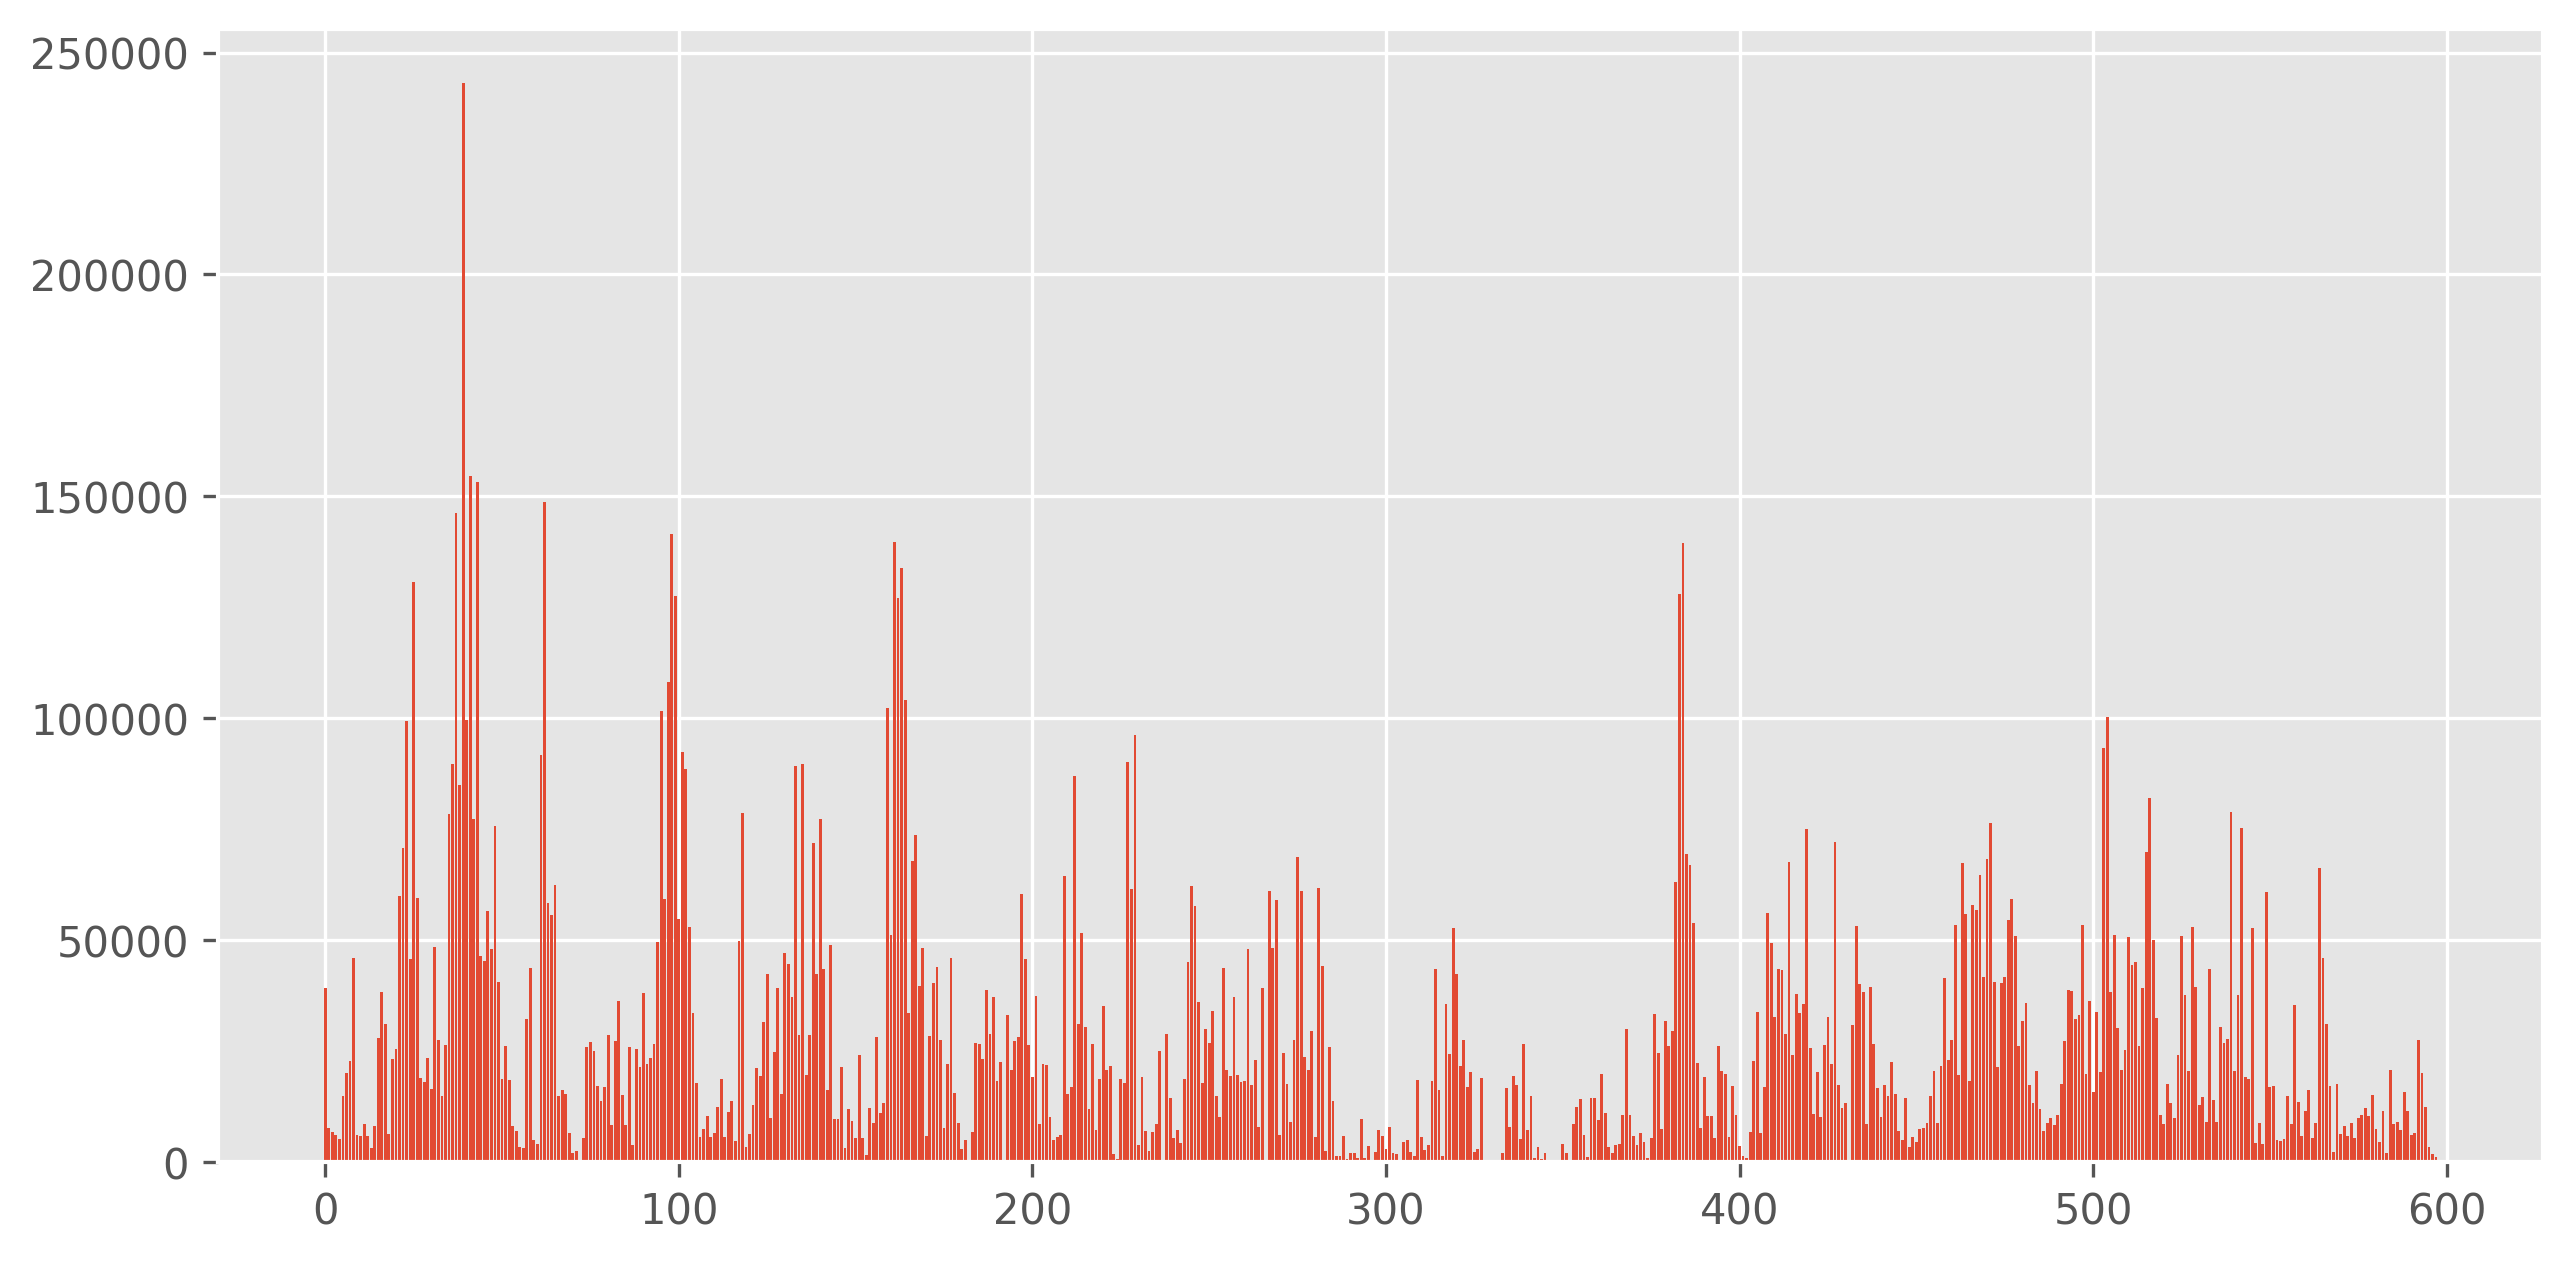

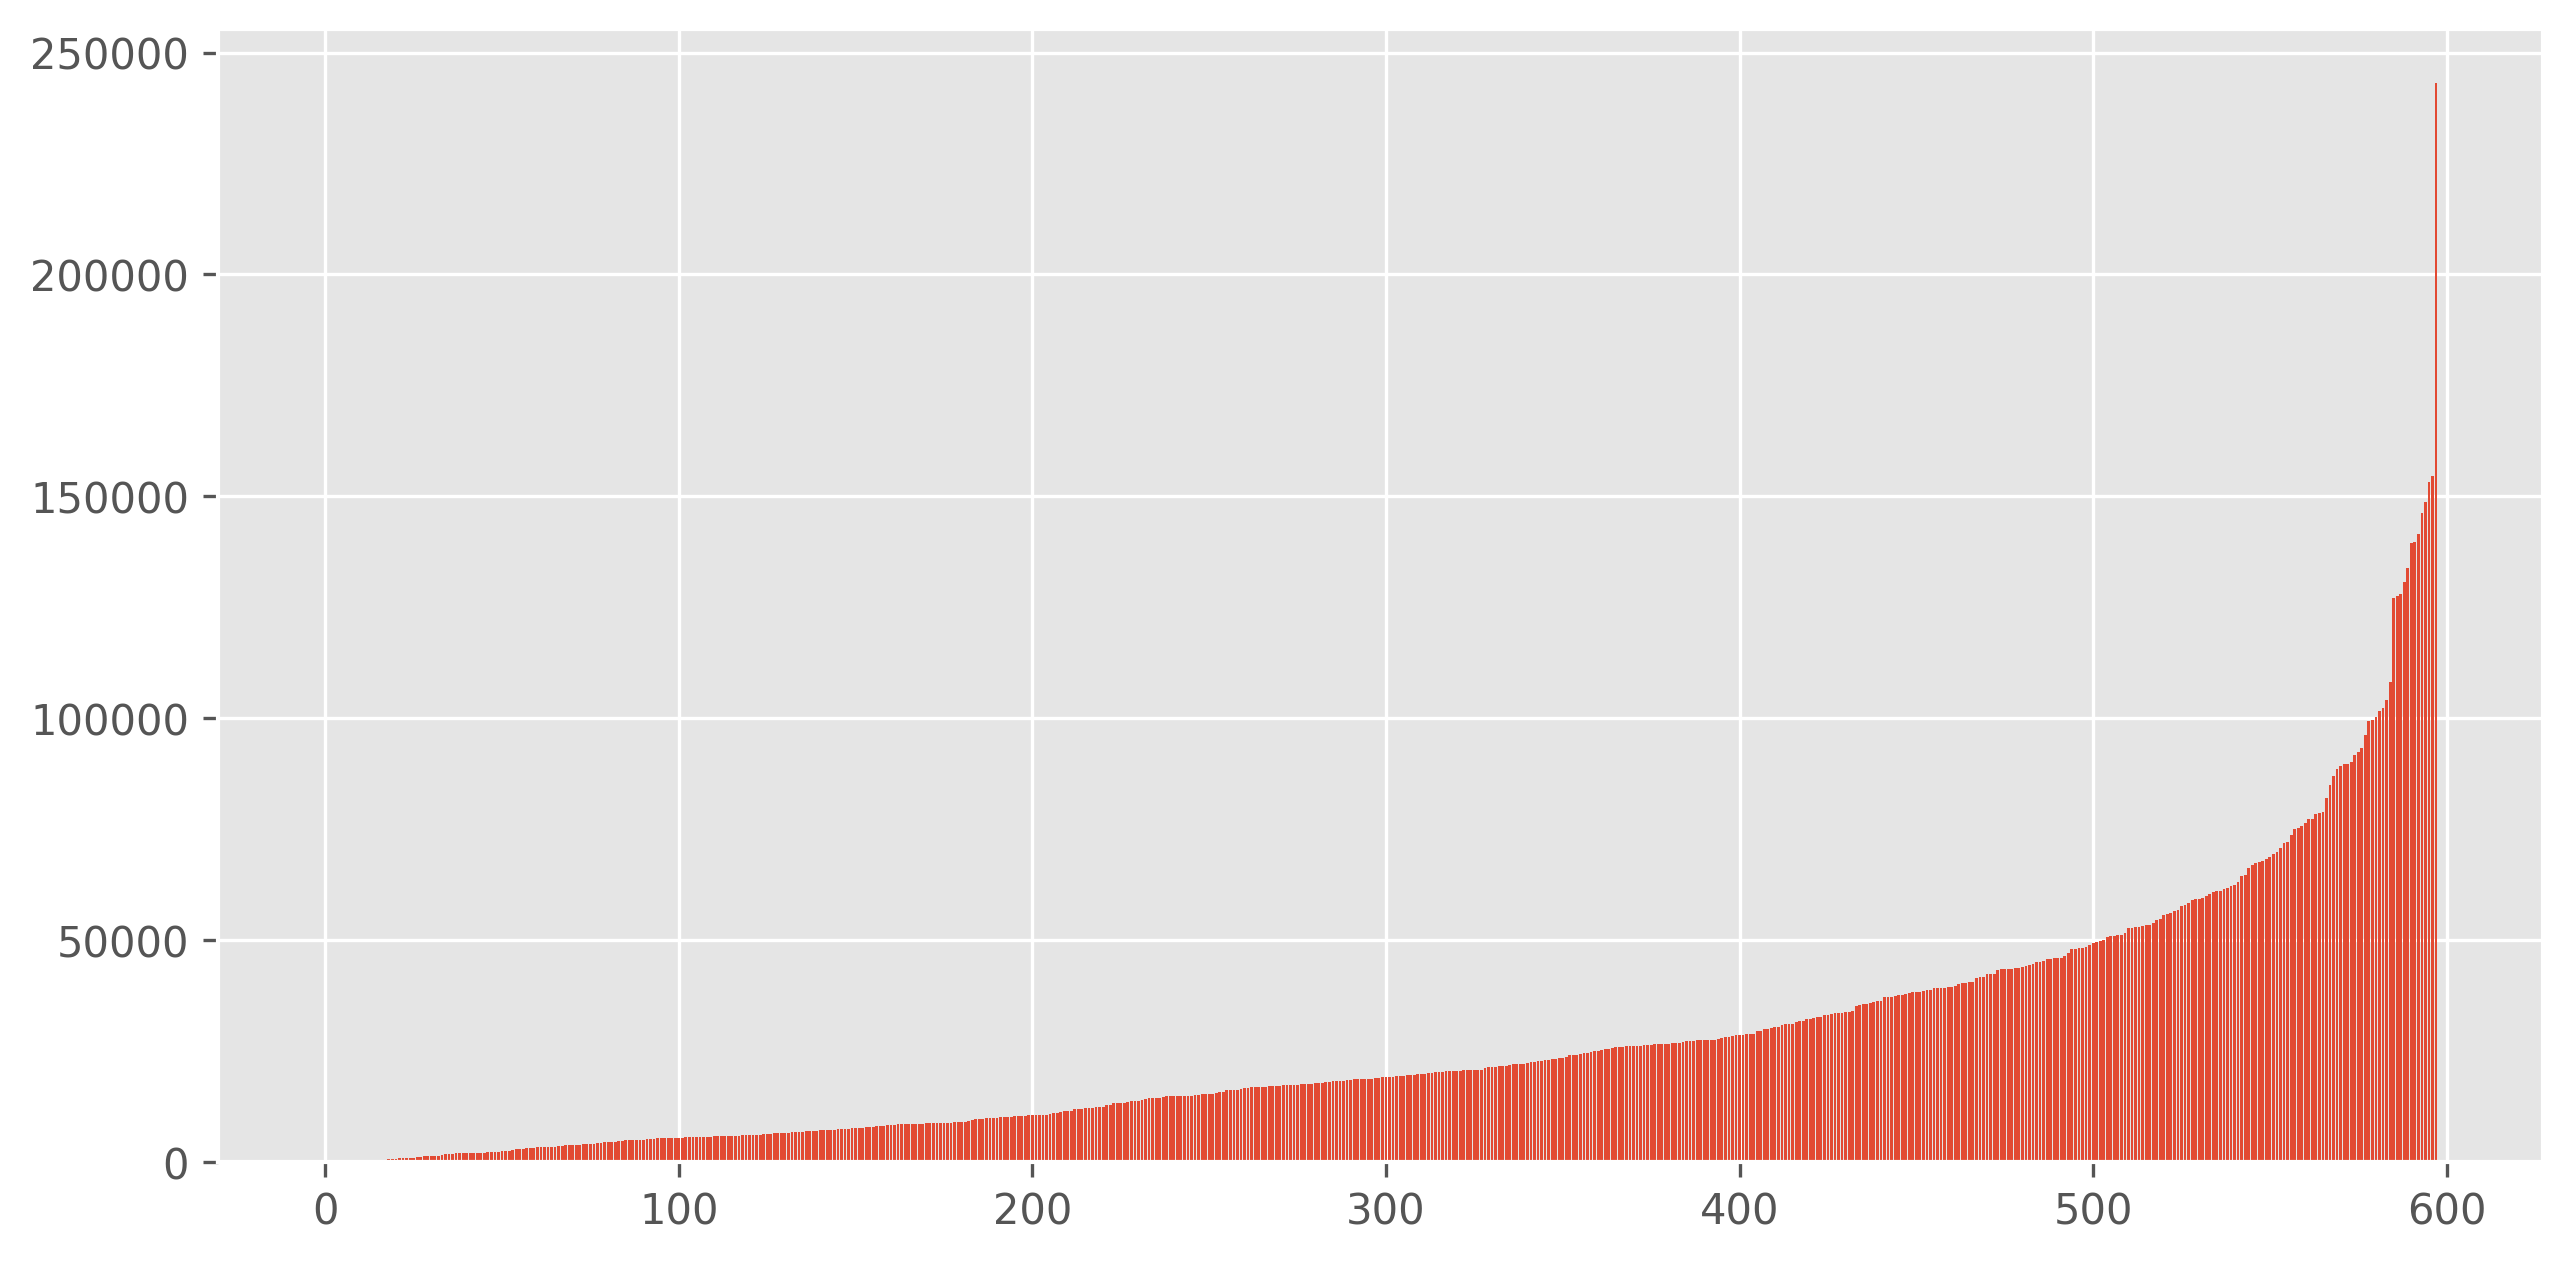

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.bar(range(len(res)),res)
plt.show()
# 데이터를 오름차순 정렬하여 다시 시각화
res.sort()
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.bar(range(len(res)),res)
plt.show()

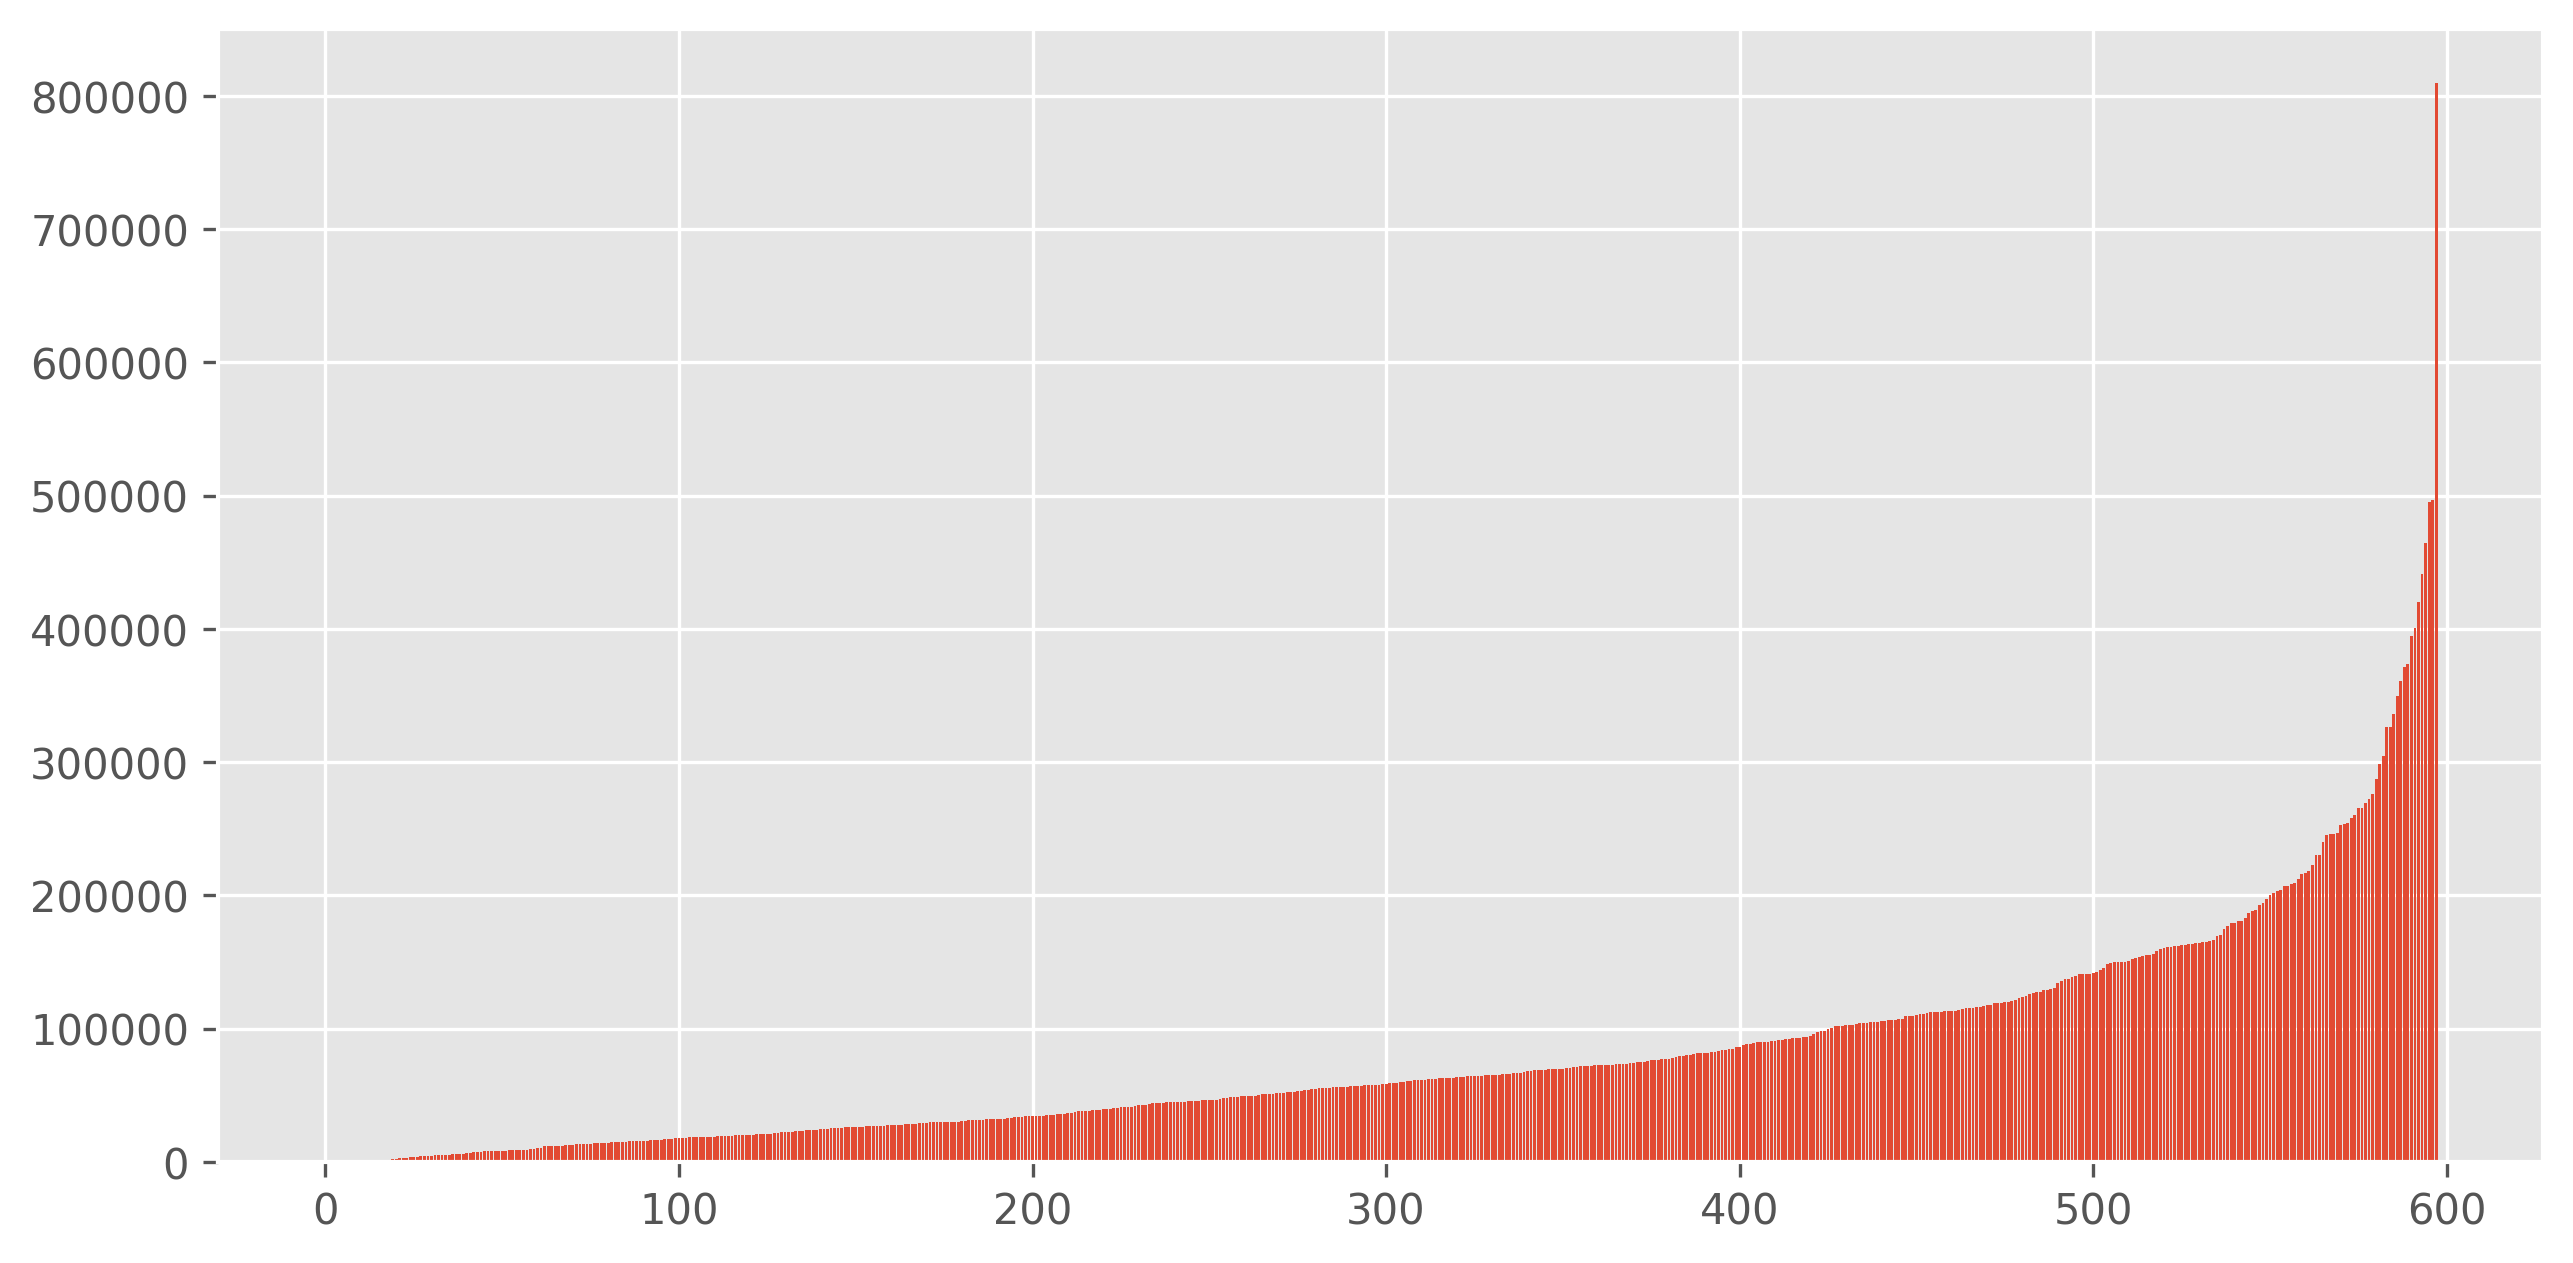

In [7]:
# 7~9시 승차인원 합하기
f=open(d_pth,'r')
data=csv.reader(f)
next(data)
next(data)
res=[]
for row in data:
    row[4:]=map(int,row[4:])
    res.append(sum(row[10:15:2]))
f.close()
res.sort()
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.bar(range(len(res)),res)
plt.show()

In [8]:
# 출근시간 승차인원이 최대인 역은 어디인가
f=open(d_pth,'r')
data=csv.reader(f)
next(data)
next(data)
max_num=0
max_station=[]
for row in data:
    row[4:]=map(int,row[4:])
    if sum(row[10:15:2])>int(max_num):
        max_num=sum(row[10:15:2])
        max_station=row[3]+' '+row[1]
print('7~9시까지 가장 많이 승차하는 역은 ',max_station,'이고, ' ,max_num,'명이 승차합니다.')
f.close()

7~9시까지 가장 많이 승차하는 역은  신림 2호선 이고,  809541 명이 승차합니다.


In [9]:
# 출근시간 하차인원이 최대인 곳
f=open(d_pth,'r')
data=csv.reader(f)
next(data)
next(data)
max_num=0
max_station=[]
for row in data:
    row[4:]=map(int,row[4:])
    if sum(row[11:16:2])>int(max_num):
        max_num=sum(row[11:16:2])
        max_station=row[3]+' '+row[1]
print('7~9시까지 가장 많이 하차하는 역은 ',max_station,'이고, ' ,max_num,'명이 하차합니다.')
f.close()

7~9시까지 가장 많이 하차하는 역은  강남 2호선 이고,  984427 명이 하차합니다.


## 시간을 입력받아 해당 시간에 최다 이용 역 찾기

In [10]:
f=open(d_pth,'r')
data=csv.reader(f)
next(data)
next(data)
max_num=0
max_station=[]
st=int(input('시간을 입력하세요'))
for row in data:
    row[4:]=map(int,row[4:])
    a=row[2*st-4]
    if a>max_num:
        max_num=a
        max_station=row[3]+' '+row[1]
print(st,'시에 가장 많이 이용하는 역은 ',max_station,'이고, ' ,max_num,'명이 이용합니다.')
f.close()

시간을 입력하세요23
23 시에 가장 많이 이용하는 역은  강남 2호선 이고,  145504 명이 이용합니다.


## 시간대별 승 하차인원이 많은 역

['구로(4시)', '홍대입구(5시)', '신림(6시)', '신림(7시)', '신림(8시)', '신림(9시)', '신림(10시)', '신림(11시)', '강남(12시)', '강남(13시)', '강남(14시)', '강남(15시)', '강남(16시)', '강남(17시)', '강남(18시)', '강남(19시)', '강남(20시)', '강남(21시)', '강남(22시)', '강남(23시)', '강남(24시)', '강남(25시)', '성신여대입구(돈암)(26시)', '신방화(27시)'] [8418, 42966, 80407, 243083, 355172, 211286, 113830, 98765, 126159, 170216, 169097, 203483, 227268, 291623, 431115, 292521, 235489, 295326, 314609, 145504, 27203, 36, 3, 1]


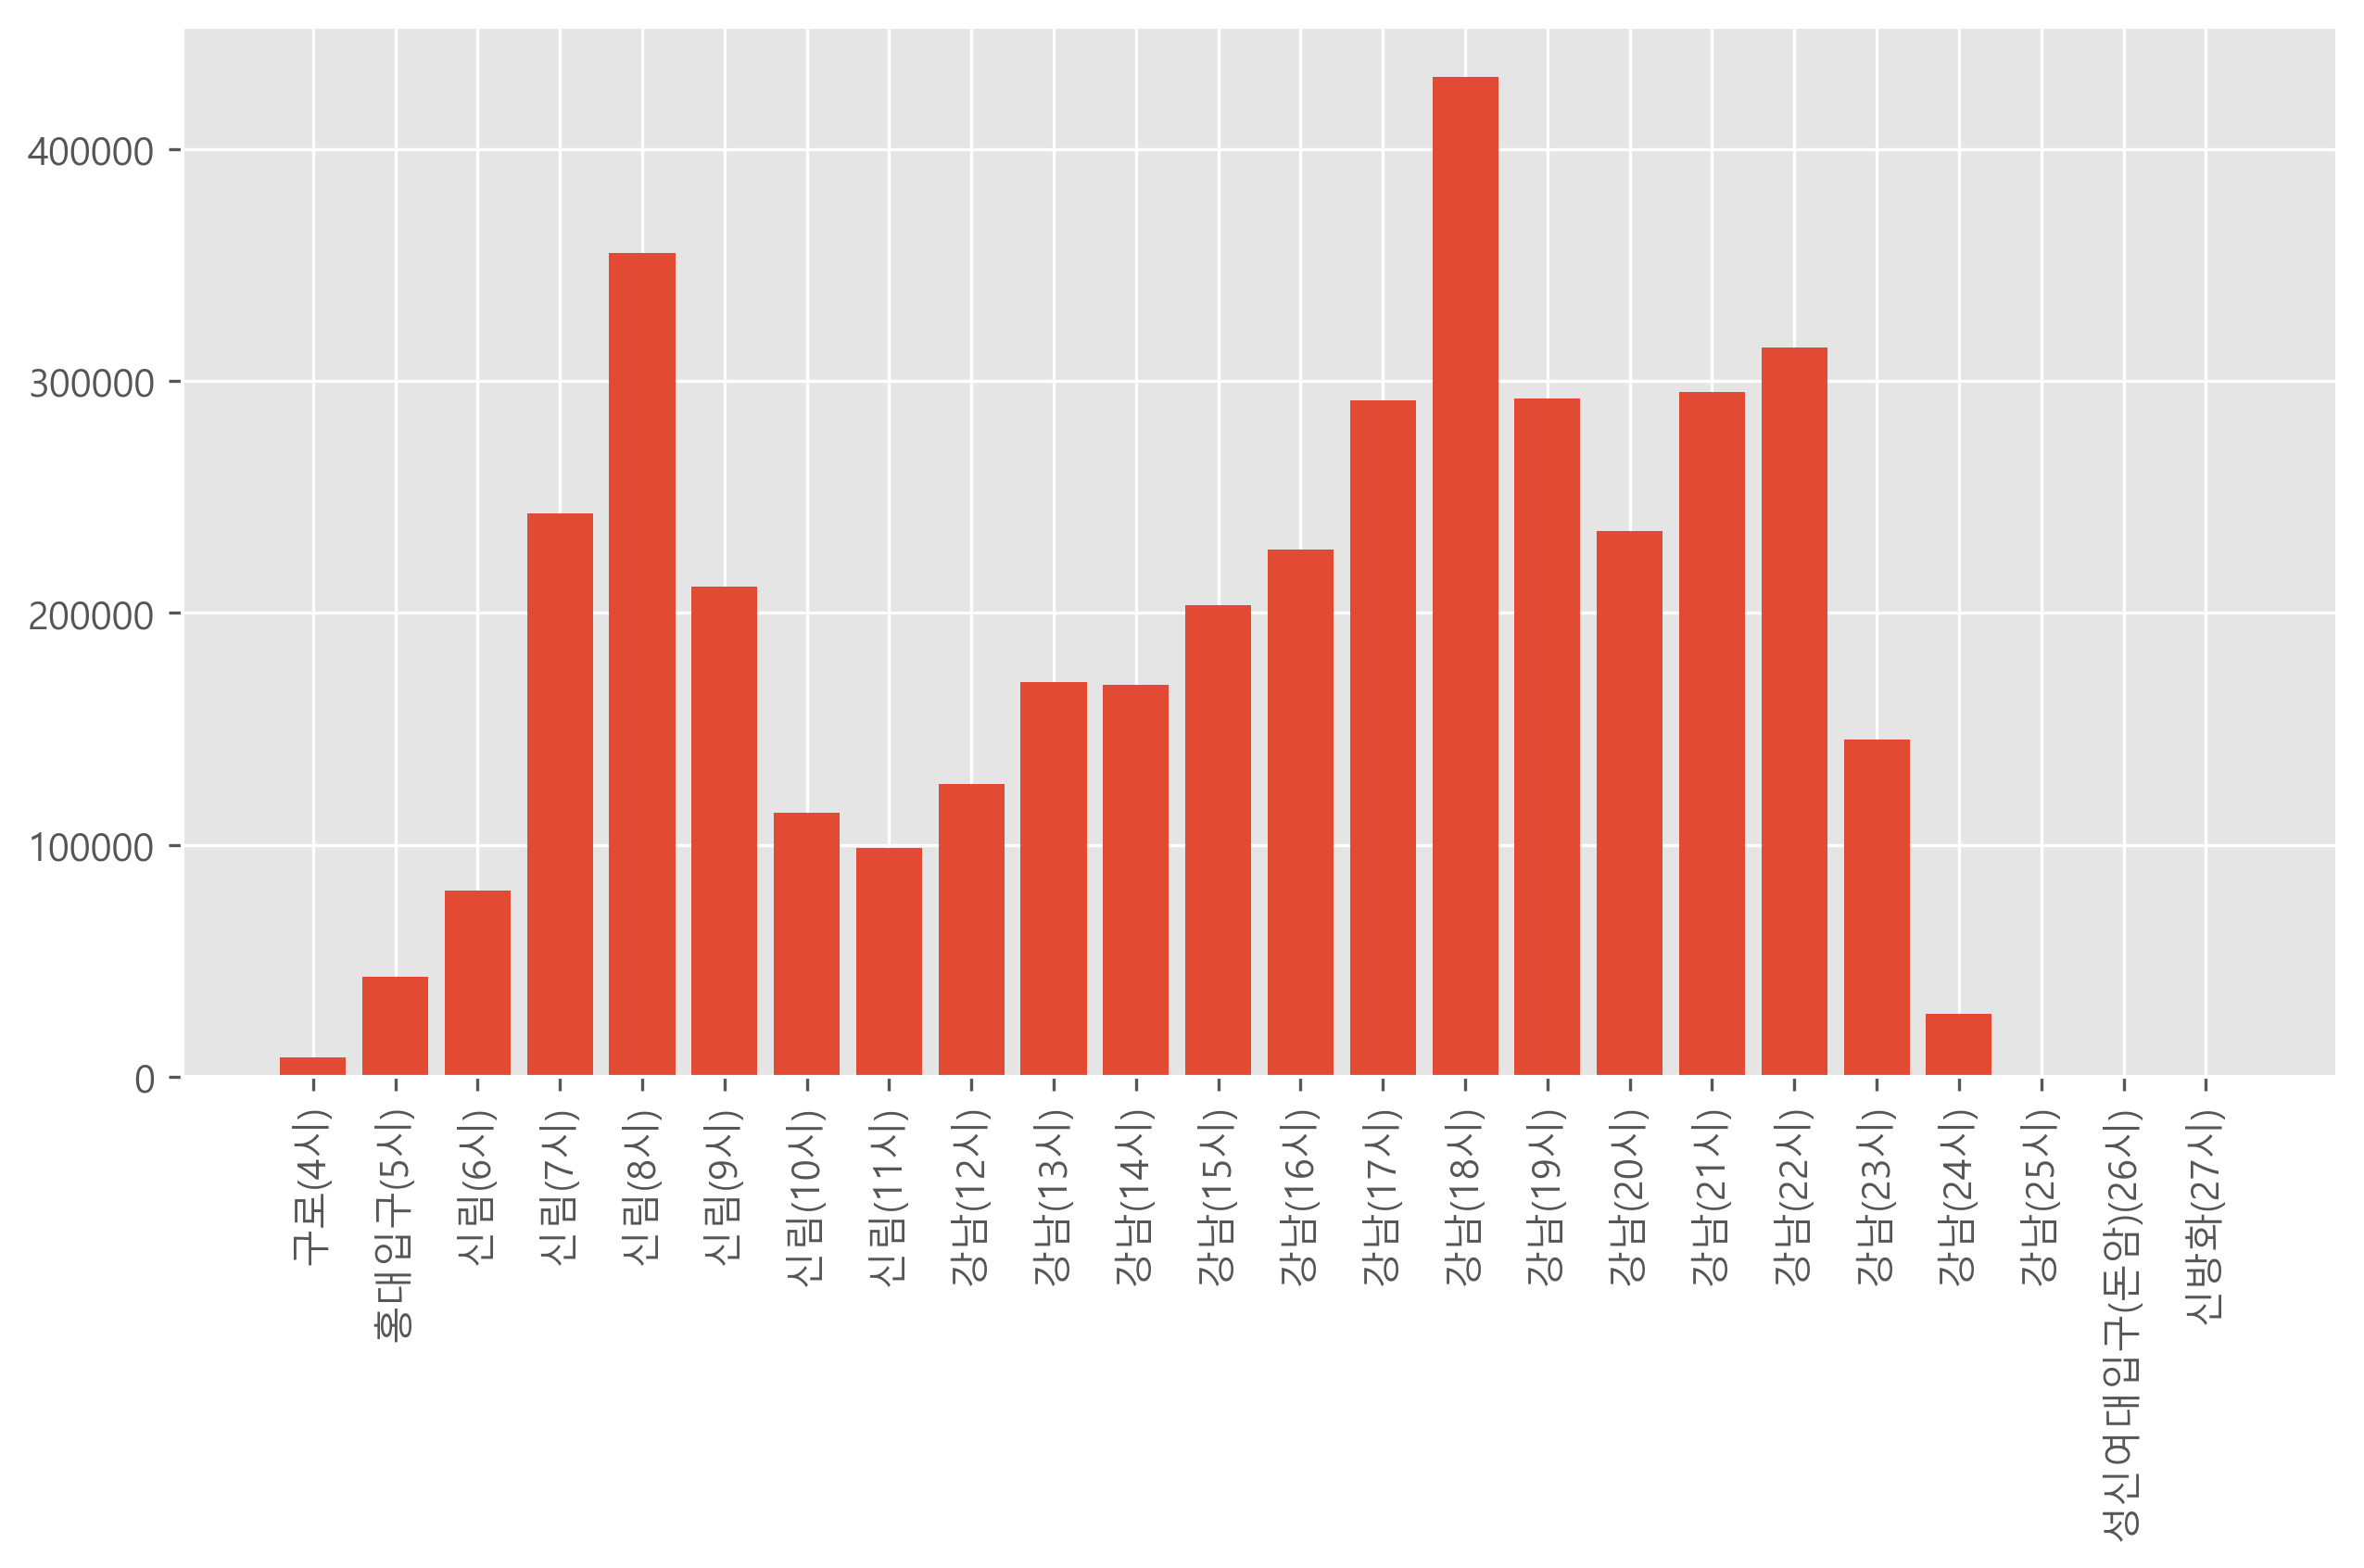

In [11]:
# 시간별 최대 승차인원
f=open(d_pth,'r')
data=csv.reader(f)
next(data)
next(data)
max_num=[0]*24
max_station=['']*24
for row in data:
    row[4:]=map(int,row[4:])
    for j in range(24):
        a=row[j*2+4]
        if a>max_num[j]:
            max_num[j]=a
            max_station[j]=row[3]+'('+str(j+4)+'시)'
print(max_station,max_num)
f.close()
plt.rc('font',family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)

plt.bar(range(24),max_num)
plt.xticks(range(24),max_station,rotation=90)
plt.show()

['부평(4시)', '강남(5시)', '강남(6시)', '강남(7시)', '가산디지털단지(8시)', '강남(9시)', '강남(10시)', '강남(11시)', '강남(12시)', '강남(13시)', '홍대입구(14시)', '홍대입구(15시)', '홍대입구(16시)', '홍대입구(17시)', '강남(18시)', '신림(19시)', '신림(20시)', '신림(21시)', '신림(22시)', '신림(23시)', '신림(24시)', '서울대입구(관악구청)(25시)', '성신여대입구(돈암)(26시)', ''] [106, 12987, 58425, 184588, 449728, 420878, 200209, 173073, 177366, 216039, 185683, 186096, 196176, 223886, 301515, 288901, 172144, 163385, 162811, 109651, 35670, 4456, 4, 0]


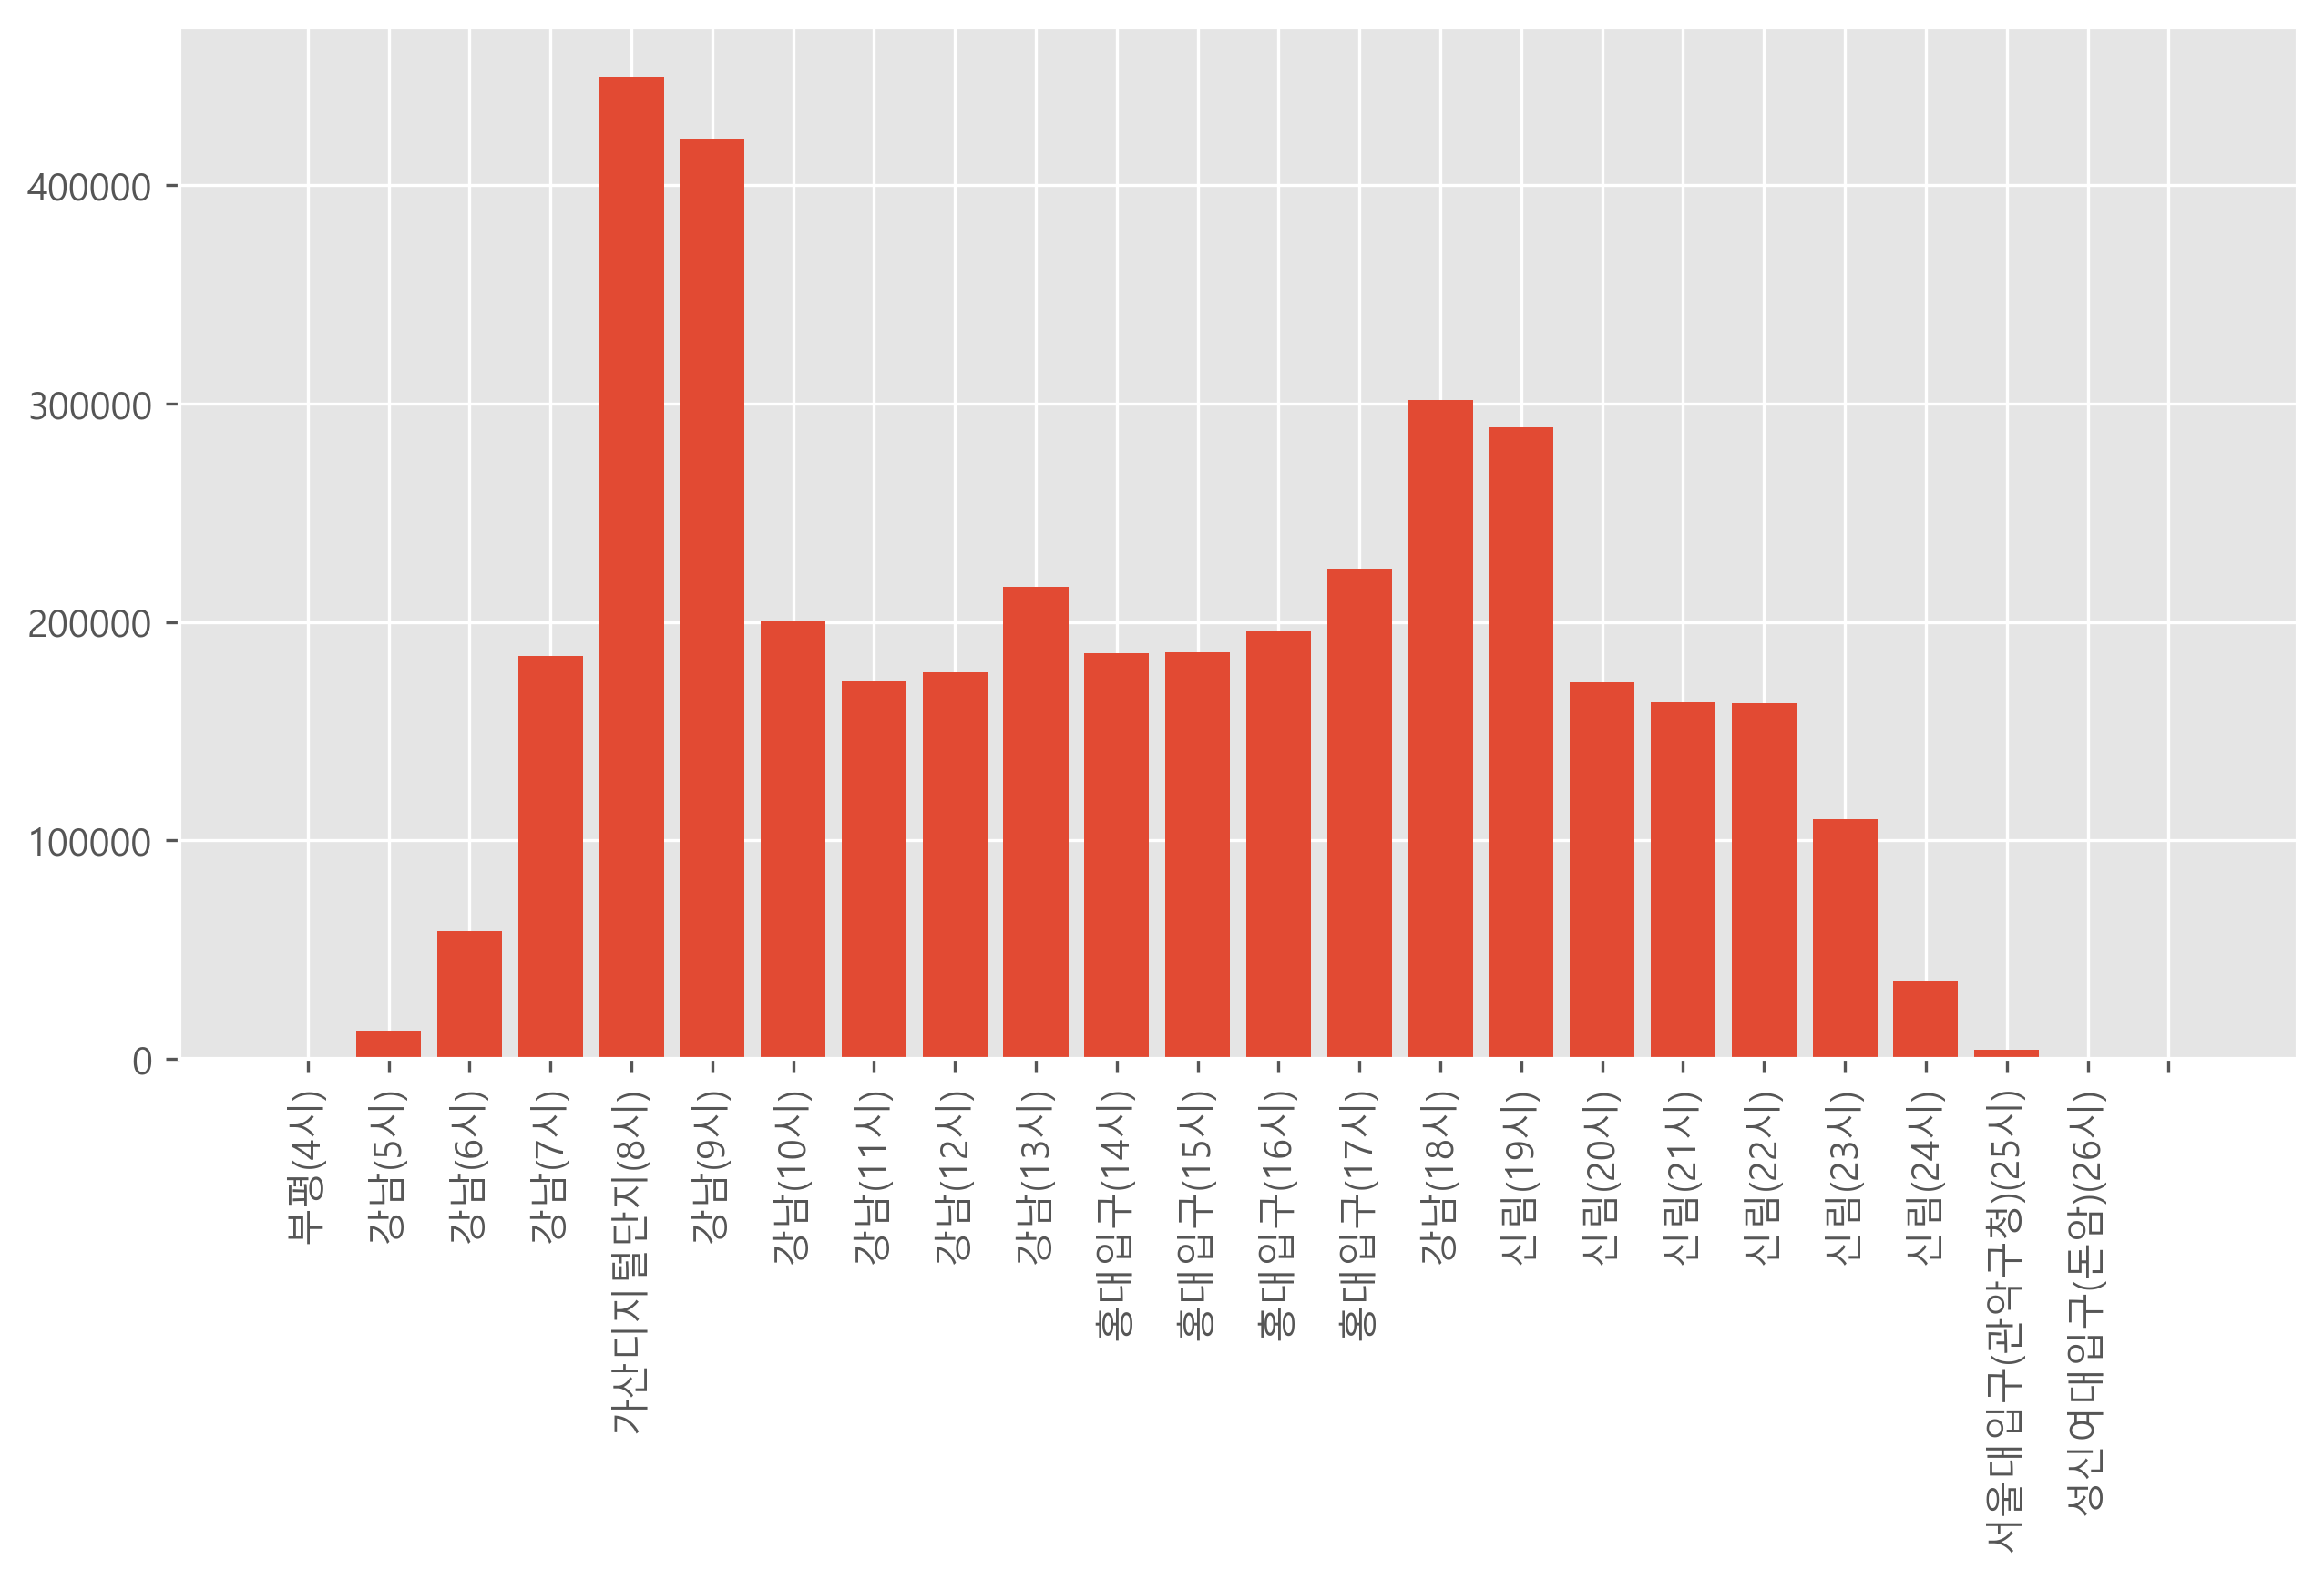

In [12]:
# 시간별 최대 하차인원
f=open(d_pth,'r')
data=csv.reader(f)
next(data)
next(data)
max_num=[0]*24
max_station=['']*24
for row in data:
    row[4:]=map(int,row[4:])
    for j in range(24):
        a=row[j*2+5]
        if a>max_num[j]:
            max_num[j]=a
            max_station[j]=row[3]+'('+str(j+4)+'시)'
print(max_station,max_num)
f.close()
plt.rc('font',family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)

plt.bar(range(24),max_num)
plt.xticks(range(24),max_station,rotation=90)
plt.show()

## 모든 역에 대한 시간별 승하차 인원 추이

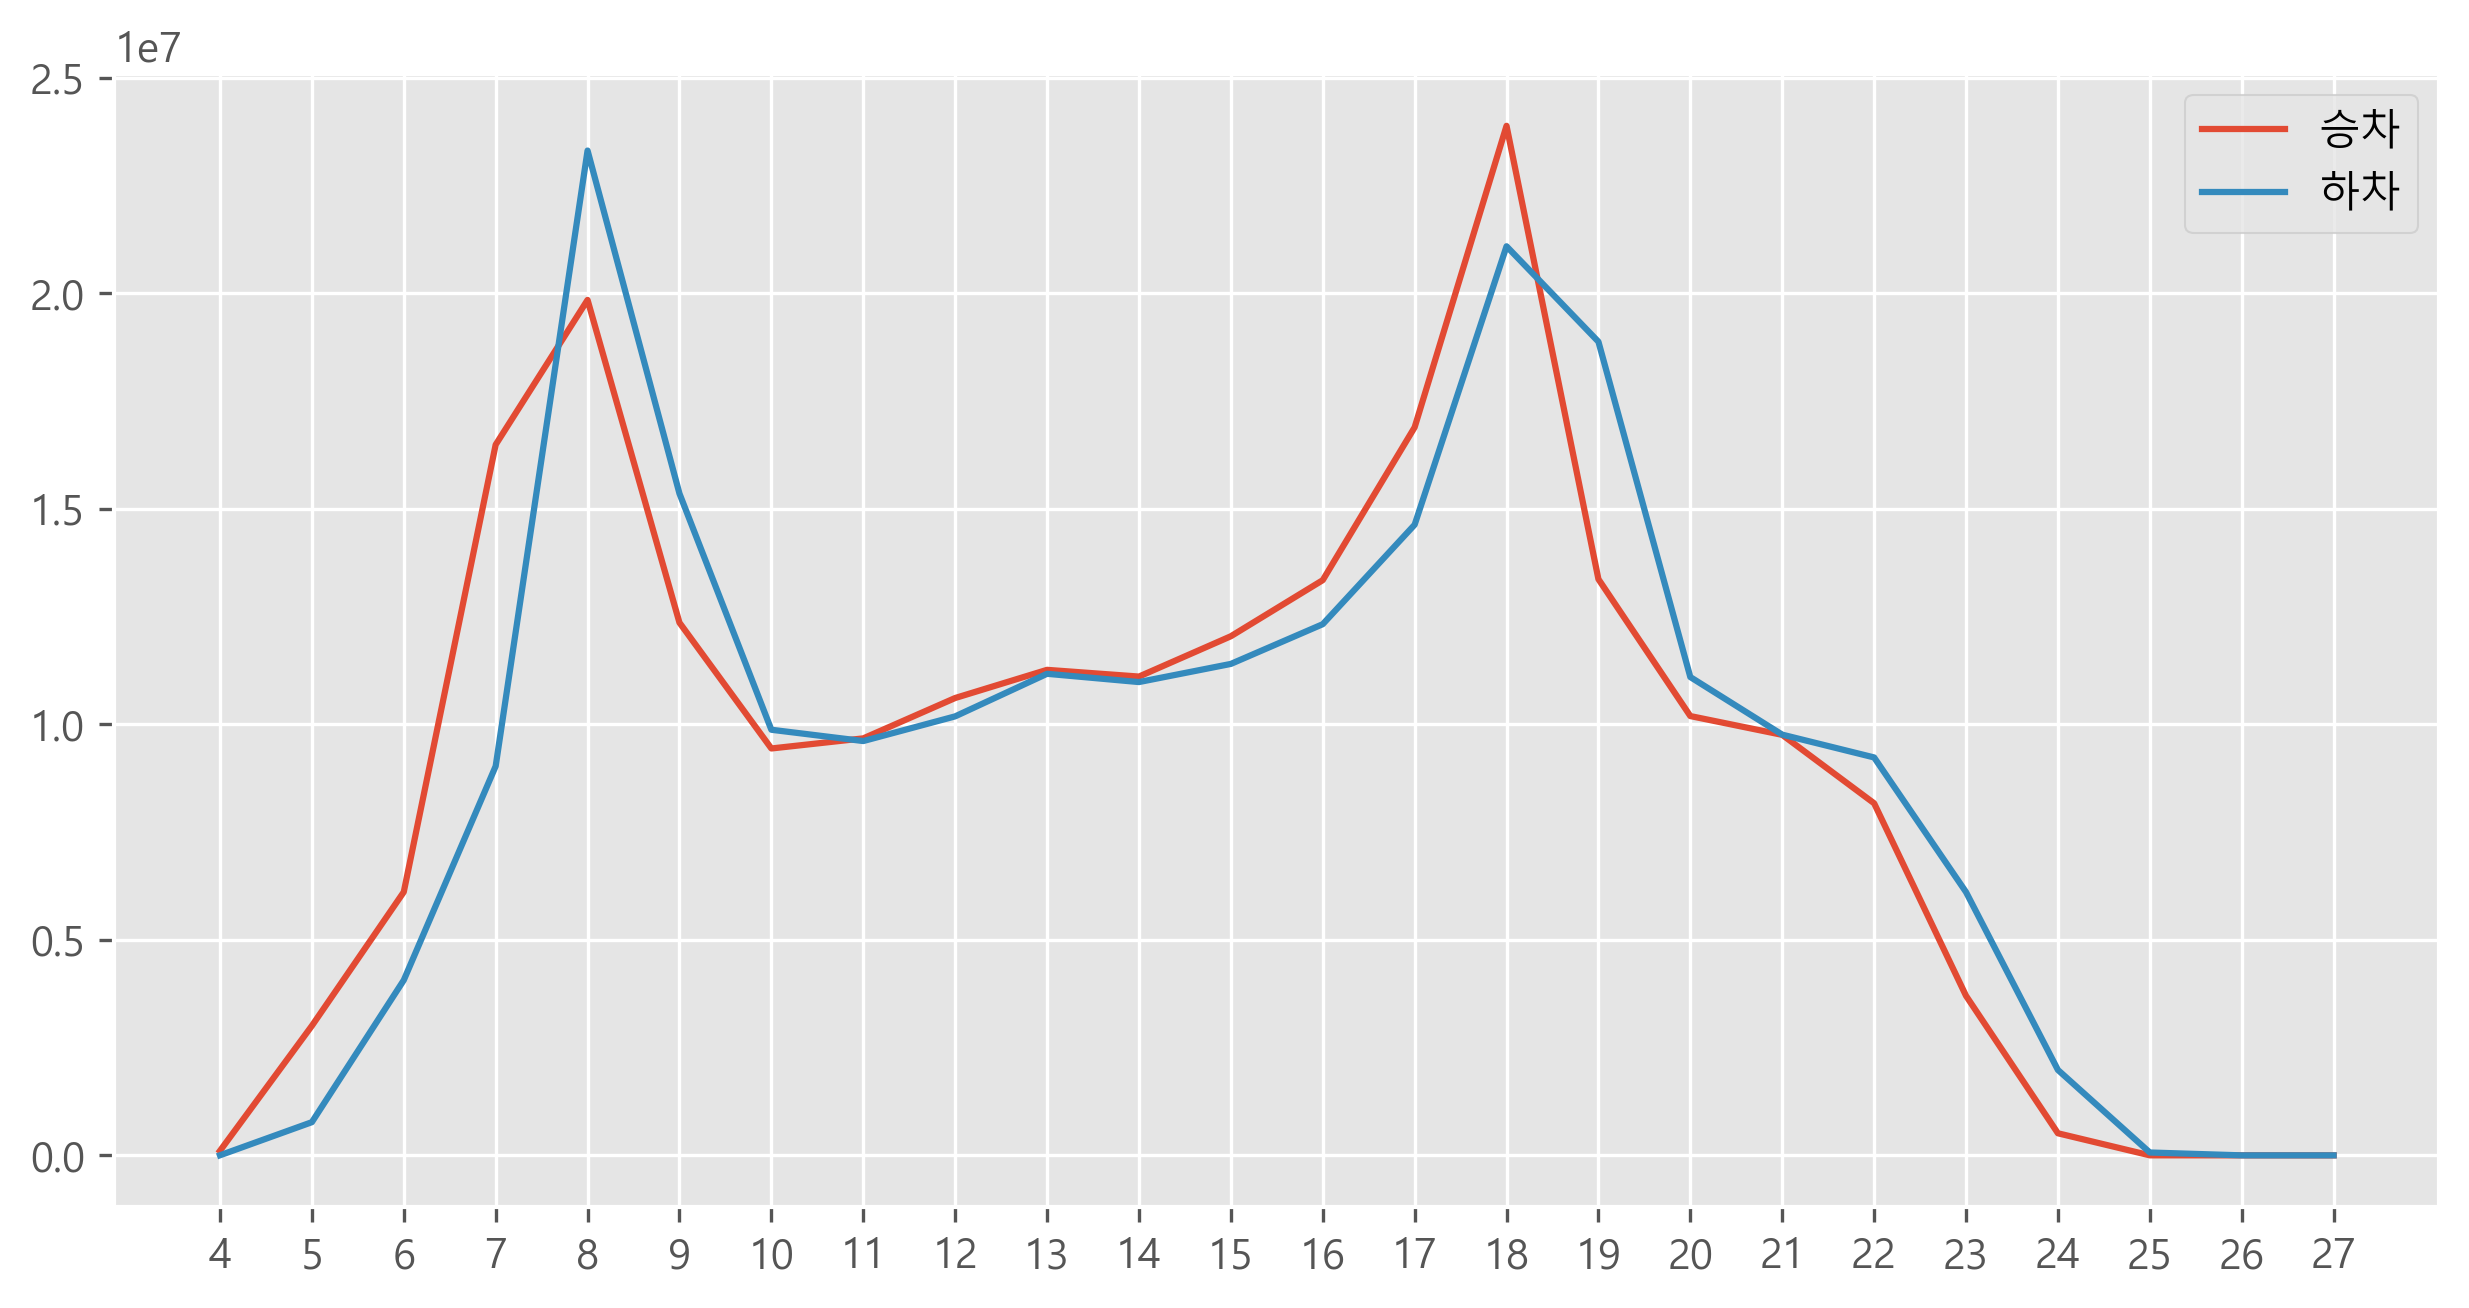

In [13]:

f=open(d_pth,'r')
data=csv.reader(f)
next(data)
next(data)
s_in=[0]*24
s_out=[0]*24
for row in data:
    row[4:]=map(int,row[4:])
    for j in range(24):
        s_in[j]+=row[j*2+4]
        s_out[j]+=row[j*2+5]

f.close()
plt.rc('font',family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.plot(range(24),s_in,label='승차')
plt.plot(range(24),s_out,label='하차')
plt.xticks(range(24),range(4,28))
plt.legend()
plt.show()